In [2]:
import plotly.graph_objects as go
import numpy as np

import matplotlib.pyplot as plt

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [4]:
from matplotlib import interactive
interactive(True)


Implementation of normal equation $\theta =(X^T X )^{-1} X^T \vec{y}$

In [24]:
def normalEqn(X, y ):
    
    theta  = np.dot(np.dot(np.linalg.inv( np.dot(np.transpose(X),X) ) , np.transpose(X)  ),y)
    
    return theta

In [141]:
def gradientDescent_simple(X, y, theta, alpha, num_iters):
    print 
    m = np.shape(X)[0]
    J_history = np.zeros(num_iters, dtype=np.float64)
    theta_history = np.zeros([num_iters, np.shape(theta)[0] ], dtype=np.float64)

    for i in range(num_iters):
        J_history[i] = computeCost(X =X, y=y, theta=theta)
        theta_history[i] = theta
        theta = theta - ( (alpha/ m )  ) * np.dot( (np.dot(X, theta) -y), X) 
    
    return theta, J_history, theta_history

In [10]:
def computeCost(X, y, theta):
    
    m = np.shape(X)[0]

    J =  1.0/(2*m)   * np.sum( (np.dot(X, theta) -y)**2 )  
    
    return J 

In [129]:
def featureNormalize( X ):
    
#    there is difference in implementation of std function in octave and numpy  
#    octave implementaion https://octave.sourceforge.io/octave/function/std.html
#    numpy implementaion https://numpy.org/doc/1.18/reference/generated/numpy.std.html
#    to have same result in both implementation we nead to use flag ddof=1


    mu = np.mean(X,axis=0)
    sigma = np.std(X, axis=0, ddof=1 )
    
    normalized_X = ( X - mu )/sigma
    
    return normalized_X, mu, sigma
    

In [134]:
data = np.loadtxt(fname='ex1data2.txt', delimiter=',')


In [143]:
x = np.copy(data[:,:-1])
y = np.copy(data[:,-1])
m = np.shape(x)[0]

# Solving with gradient descent

In [144]:
x, mu, sigma =featureNormalize( x )

In [145]:
theta = np.zeros([np.shape(x)[1]+1])

In [146]:
X = np.ones([m,np.shape(x)[1]+1])
X[:,1:] = x
X[:5]

array([[ 1.        ,  0.13000987, -0.22367519],
       [ 1.        , -0.50418984, -0.22367519],
       [ 1.        ,  0.50247636, -0.22367519],
       [ 1.        , -0.73572306, -1.53776691],
       [ 1.        ,  1.25747602,  1.09041654]])

In [147]:

iterations = 400
alpha = 0.01

theta, J_history, theta_history = gradientDescent_simple(X=X, y=y , theta=theta, alpha=alpha, num_iters=iterations )
print(theta)


[0. 0. 0.]
[334302.06399328 100087.11600585   3673.54845093]


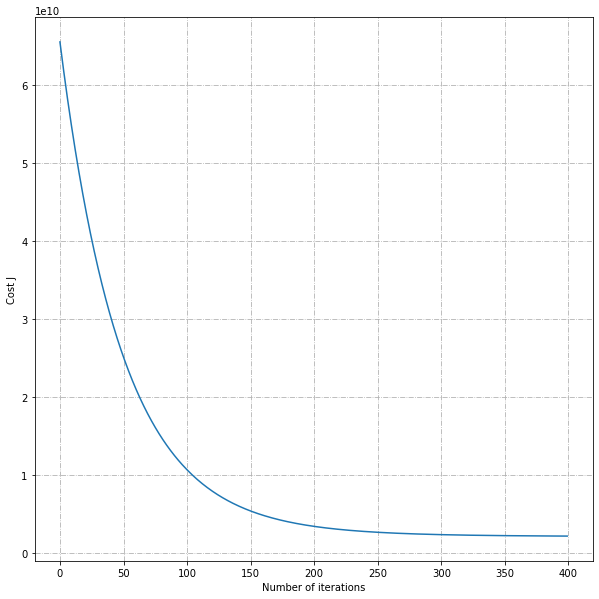

In [149]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

ax.plot(J_history, '-' )

ax.set_xlabel("Number of iterations")
ax.set_ylabel("Cost J")

plt.show()

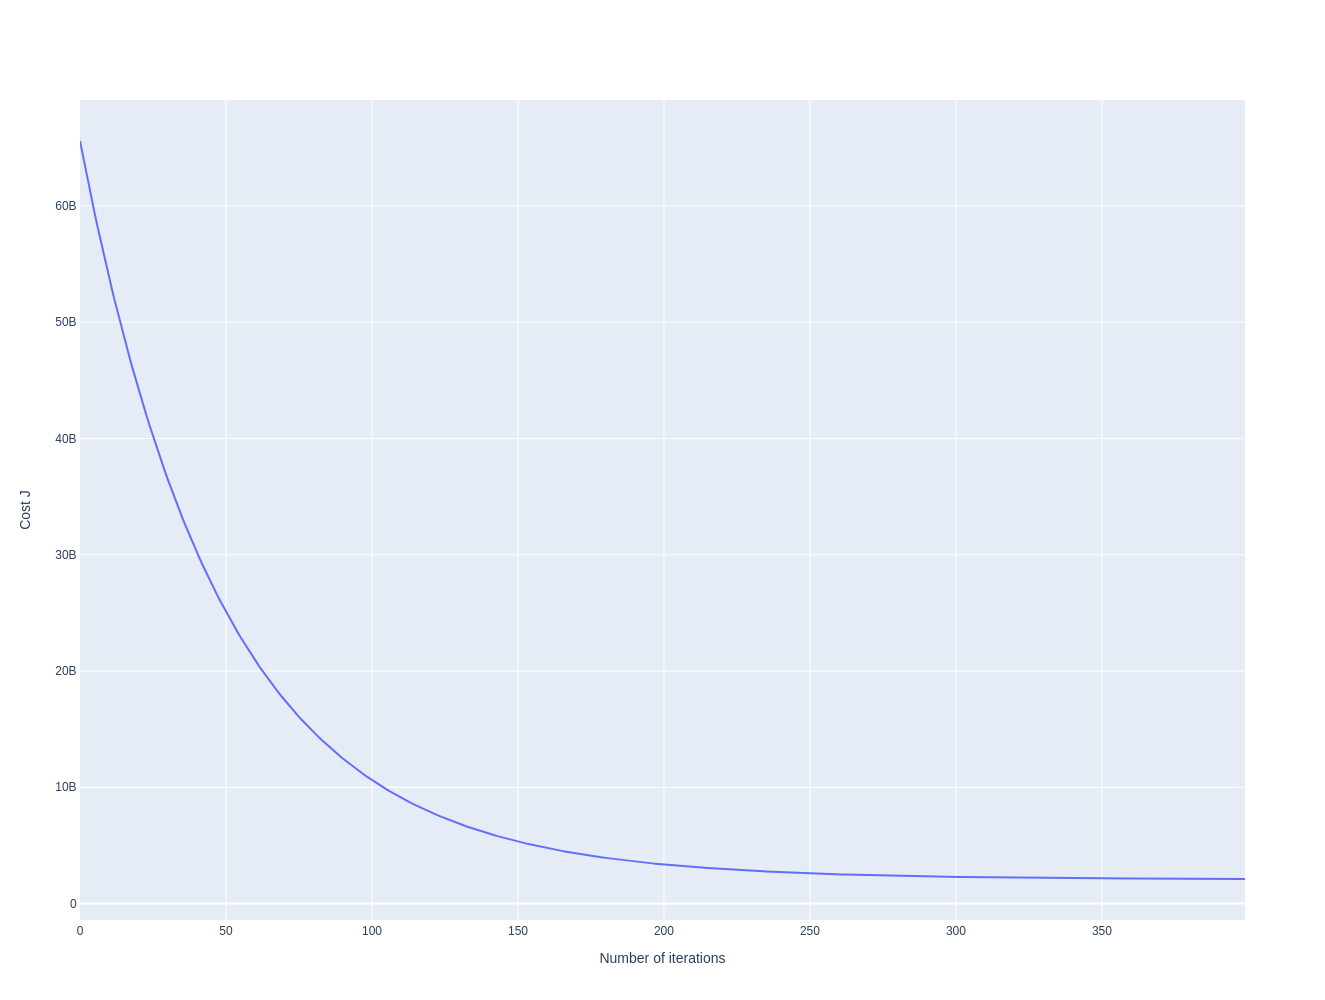

In [152]:
fig2 = go.Figure()

layout = go.Layout( autosize=False,
                    width=1000,
                    height=1000,
                    xaxis = dict( title_text = "Number of iterations"),
                    yaxis = dict( title_text = "Cost J") )

trace1 = go.Scatter( y = J_history, mode='lines' )


fig2.layout = layout
fig2.add_trace( trace1 )

Estimate the price of a 1650 sq-ft, 3 br house


In [165]:
surface = 1650
bedrooms = 3

In [187]:
price =  np.sum((1, (surface-mu[0])/sigma[0], (bedrooms-mu[1])/sigma[1]) * theta )
print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n {price }\n' )

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 91490.9576635477



# Solving with normal equations

In [172]:
x = np.copy(data[:,:-1])
y = np.copy(data[:,-1])
m = np.shape(x)[0]

In [173]:
X = np.ones([m,np.shape(x)[1]+1])
X[:,1:] = x
X[:5]

array([[1.000e+00, 2.104e+03, 3.000e+00],
       [1.000e+00, 1.600e+03, 3.000e+00],
       [1.000e+00, 2.400e+03, 3.000e+00],
       [1.000e+00, 1.416e+03, 2.000e+00],
       [1.000e+00, 3.000e+03, 4.000e+00]])

In [185]:
theta = normalEqn(X = X, y =y)
print(f'Theta computed from the normal equations: \n { theta}')

Theta computed from the normal equations: 
 [89597.9095428    139.21067402 -8738.01911233]


In [175]:
surface = 1650
bedrooms = 3

In [186]:
price =  np.sum((1, surface, bedrooms) * theta )
print(f'Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n {price }\n' )

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 293081.4643348949



# Additional Part, path of gradient:

In [213]:
x = np.copy(data[:,:-1])
y = np.copy(data[:,-1])
m = np.shape(x)[0]

In [214]:
x, mu, sigma =featureNormalize( x )

In [215]:
X = np.ones([m,np.shape(x)[1]+1])
X[:,1:] = x

In [246]:
theta = np.zeros([np.shape(x)[1]+1])

In [247]:
iterations = 300
alpha = 0.1

theta, J_history, theta_history = gradientDescent_simple(X=X, y=y , theta=theta, alpha=alpha, num_iters=iterations )
print(theta)

[340412.65957446 110630.9424711   -6649.36646307]


In [248]:
surface = 1650
bedrooms = 3

In [249]:
price =  np.sum((1, (surface-mu[0])/sigma[0], (bedrooms-mu[1])/sigma[1]) * theta )
print(f'Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n {price }\n' )

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 293081.48779364215



In [250]:
theta_history[:10]

array([[     0.        ,      0.        ,      0.        ],
       [ 34041.26595745,  10463.29337662,   5412.36838441],
       [ 64678.40531915,  19605.89326429,   9721.5716664 ],
       [ 92251.83074468,  27617.51832109,  13107.96020042],
       [117067.91362766,  34659.43484056,  15723.83544149],
       [139402.38822234,  40868.77867962,  17697.75449704],
       [159503.41535755,  46362.21827695,  19138.17651763],
       [177594.33977924,  51239.05932171,  20136.55145404],
       [193876.17175877,  55583.87628079,  20769.93635814],
       [208529.82054034,  59468.74298514,  21103.2113987 ]])

In [251]:
theta_history[-10:]

array([[340412.65957445, 110630.88284824,  -6649.30684021],
       [340412.65957445, 110630.89005898,  -6649.31405095],
       [340412.65957445, 110630.89695918,  -6649.32095115],
       [340412.65957445, 110630.9035622 ,  -6649.32755417],
       [340412.65957446, 110630.90988085,  -6649.33387283],
       [340412.65957446, 110630.91592738,  -6649.33991935],
       [340412.65957446, 110630.9217135 ,  -6649.34570547],
       [340412.65957446, 110630.92725043,  -6649.3512424 ],
       [340412.65957446, 110630.9325489 ,  -6649.35654087],
       [340412.65957446, 110630.93761918,  -6649.36161115]])

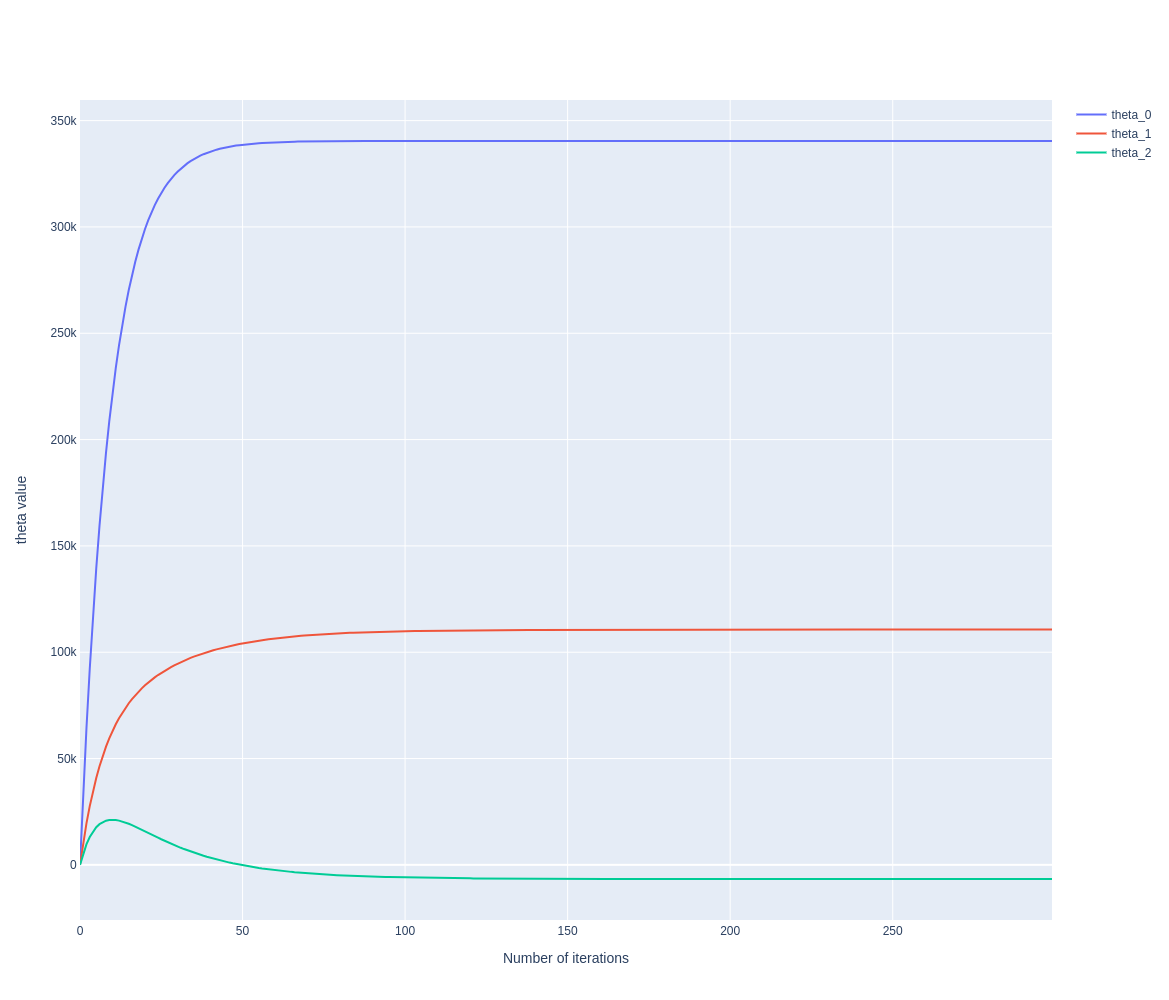

In [252]:
fig3 = go.Figure()

layout = go.Layout( autosize=False,
                    width=1000,
                    height=1000,
                    xaxis = dict( title_text = "Number of iterations"),
                    yaxis = dict( title_text = "theta value") )

trace_theta0 = go.Scatter(name='theta_0', y = theta_history[:,0], mode='lines' )
trace_theta1 = go.Scatter(name='theta_1', y = theta_history[:,1], mode='lines' )
trace_theta2 = go.Scatter(name='theta_2', y = theta_history[:,2], mode='lines' )

fig3.layout = layout
fig3.add_trace( trace_theta0  )
fig3.add_trace( trace_theta1 )
fig3.add_trace( trace_theta2 )